# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


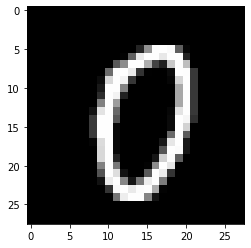

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
# create two datasets one with digits below 5 and one with 5 and above
x_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]


In [0]:
x_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] 
x_test_gte5 = X_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] 

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
x_train_lt5.shape
y_train_lt5.shape
x_test_lt5.shape
y_test_lt5.shape
x_train_gte5.shape
y_train_gte5.shape 
x_test_gte5.shape
y_test_gte5.shape

(30596, 28, 28)

(30596,)

(5139, 28, 28)

(5139,)

(29404, 28, 28)

(29404,)

(4861, 28, 28)

(4861,)

## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train_lt5 = x_train_lt5.reshape(x_train_lt5.shape[0], img_rows, img_cols, 1)
x_test_lt5 = x_test_lt5.reshape(x_test_lt5.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
x_train_lt5.shape
x_test_lt5.shape

(30596, 28, 28, 1)

(5139, 28, 28, 1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
x_train_lt5 = x_train_lt5.astype('float32')
x_test_lt5 = x_test_lt5.astype('float32')

#Normalizing the input
x_train_lt5 /= 255
x_test_lt5 /= 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [0]:
print('x_train_lt5 shape:', x_train_lt5.shape)
print(x_train_lt5.shape[0], 'train samples')
print(x_test_lt5.shape[0], 'test samples')

x_train_lt5 shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
num_classes = 5
import keras
# convert class vectors to binary class matrices
y_train_lt5 = keras.utils.to_categorical(y_train_lt5, num_classes)
y_test_lt5 = keras.utils.to_categorical(y_test_lt5, num_classes)

In [0]:
y_train_lt5.shape

(30596, 5)

In [0]:
print(y_train_lt5[0])

[1. 0. 0. 0. 0.]


## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.2 probability 
model.add(Dropout(0.2,name='drop_1'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))
#why dropout -- > randomly remove data - to avoid overfitting

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
#Training on the dataset
model.fit(x_train_lt5, y_train_lt5,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test_lt5, y_test_lt5))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 30596 samples, validate on 5139 samples
Epoch 1/10





30596/30596 [==============================] - 9s 299us/step - loss: 0.6601 - acc: 0.7871 - val_loss: 0.2390 - val_acc: 0.9169
Epoch 2/10
30596/30596 [==============================] - 2s 64us/step - loss: 0.1984 - acc: 0.9372 - val_loss: 0.3065 - val_acc: 0.8813
Epoch 3/10
30596/30596 [==============================] - 2s 65us/step - loss: 0.1698 - acc: 0.9456 - val_loss: 0.2035 - val_acc: 0.9185
Epoch 4/10
30596/30596 [==============================] - 2s 66us/step - loss: 0.1493 - acc: 0.9544 - val_loss: 0.0675 - val_acc: 0.9790
Epoch 5/10
30596/30596 [==============================] - 2s 64us/step - loss: 0.1293 - acc: 0.9616 - val_loss: 0.0566 - val_acc: 0.9829
Epoch 6/10
30596/30596 [==============================] - 2s 65us/step - loss: 0.1204 - acc: 0.9636 - val_loss: 0.0523 - val_acc: 0.9846
Epoch 7/10
30596/30596 [==

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
#Testing the model on test set
score = model.evaluate(x_test_lt5, y_test_lt5)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5139/5139 [==============================] - 0s 56us/step
Test loss: 0.038837462645890324
Test accuracy: 0.9889083479276124


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))


conv_1
False
conv_2
False
max_1
False
drop_1
False
flatten_1
False
dense_1
True
drop_2
False
dense_2
True


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
y_train_gte5 = y_train[y_train >= 5] - 5
y_test_gte5 = y_test[y_test >= 5] - 5


In [0]:
y_train_gte5.shape

(29404,)

In [0]:
y_train_lt5.shape

(30596, 5)

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
x_train_gte5 = x_train_gte5.astype('float32')
x_test_gte5 = x_test_gte5.astype('float32')

#Normalizing the input
x_train_gte5 /= 255
x_test_gte5 /= 255

In [0]:
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train_gte5 = x_train_gte5.reshape(x_train_gte5.shape[0], img_rows, img_cols, 1)
x_test_gte5 = x_test_gte5.reshape(x_test_gte5.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [0]:
x_train_gte5.shape
x_test_gte5.shape

(29404, 28, 28, 1)

(4861, 28, 28, 1)

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
num_classes = 5
import keras
# convert class vectors to binary class matrices
y_train_gte5 = keras.utils.to_categorical(y_train_gte5, num_classes)
y_test_gte5 = keras.utils.to_categorical(y_test_gte5, num_classes)

In [0]:
print(y_test_gte5[0])

[0. 0. 1. 0. 0.]


### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [0]:
#Training on the dataset
model.fit(x_train_gte5, y_train_gte5,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test_gte5, y_test_gte5))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 2s 68us/step - loss: 0.5946 - acc: 0.8010 - val_loss: 0.2235 - val_acc: 0.9294
Epoch 2/10
29404/29404 [==============================] - 2s 66us/step - loss: 0.3201 - acc: 0.8974 - val_loss: 0.1754 - val_acc: 0.9447
Epoch 3/10
29404/29404 [==============================] - 2s 65us/step - loss: 0.2601 - acc: 0.9147 - val_loss: 0.1431 - val_acc: 0.9541
Epoch 4/10
29404/29404 [==============================] - 2s 65us/step - loss: 0.2314 - acc: 0.9269 - val_loss: 0.1294 - val_acc: 0.9597
Epoch 5/10
29404/29404 [==============================] - 2s 65us/step - loss: 0.2179 - acc: 0.9299 - val_loss: 0.1219 - val_acc: 0.9611
Epoch 6/10
29404/29404 [==============================] - 2s 64us/step - loss: 0.1972 - acc: 0.9372 - val_loss: 0.1109 - val_acc: 0.9646
Epoch 7/10
29404/29404 [==============================] - 2s 64us/step - loss: 0.1922 - acc: 0.9386 - val_loss: 0.1033 - val_acc:

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
#Testing the model on test set
score = model.evaluate(x_test_gte5, y_test_gte5)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4861/4861 [==============================] - 0s 58us/step
Test loss: 0.0924564514288476
Test accuracy: 0.9685249947466691


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [2]:
import os
cwd = os.getcwd()
print (cwd)

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd       
tweet = pd.read_csv("drive/My Drive/Neural Network/tweets.csv",encoding = 'unicode_escape')

In [50]:
tweet.shape

(9093, 3)

### Drop null values
- drop all the rows with null values

In [51]:
tweet.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

"emotion_in_tweet_is_directed_at" column has 50% null values. So, we will drop the column.

In [0]:
tweet.drop(columns='emotion_in_tweet_is_directed_at',inplace=True)

In [53]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
tweet_text                                            9092 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    9093 non-null object
dtypes: object(2)
memory usage: 142.2+ KB


In [0]:
tweet.dropna(inplace=True)

In [55]:
tweet.shape

(9092, 2)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [56]:
tweet.head(5)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
tweet = tweet.apply(lambda x: x.astype(str).str.lower())
tweet = tweet.applymap(lambda s: re.sub("[^a-zA-Z0-9#+_]"," ",s))
tweet["tweet_text"] = tweet["tweet_text"].str.strip()


print dataframe

In [42]:
tweet.head(5)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,negative emotion
1,jessedee know about fludapp awesome ipad ip...,positive emotion
2,swonderlin can not wait for #ipad 2 also they...,positive emotion
3,sxsw i hope this year s festival isn t as cras...,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa ma...,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [0]:
options = ['negative emotion', 'positive emotion'] 
tweet_df = tweet.loc[tweet['is_there_an_emotion_directed_at_a_brand_or_product'].isin(options)] 

In [59]:
tweet_df.groupby('is_there_an_emotion_directed_at_a_brand_or_product').size()

is_there_an_emotion_directed_at_a_brand_or_product
negative emotion     570
positive emotion    2978
dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [60]:
#for col in 'is_there_an_emotion_directed_at_a_brand_or_product':
#     tweet_df[col] = tweet_df[col].map({'negative emotion':0, 'positive emotion':1})

tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'] = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].map({'negative emotion':0, 'positive emotion':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
tweet_df.head(5)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,0
1,jessedee know about fludapp awesome ipad ip...,1
2,swonderlin can not wait for #ipad 2 also they...,1
3,sxsw i hope this year s festival isn t as cras...,0
4,sxtxstate great stuff on fri #sxsw marissa ma...,1


In [84]:
tweet_df["is_there_an_emotion_directed_at_a_brand_or_product"]= tweet_df["is_there_an_emotion_directed_at_a_brand_or_product"].astype('int64') 
tweet_df["tweet_text"]= tweet_df["tweet_text"].astype('category') 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = tweet_df.tweet_text

In [0]:
y = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product']

In [65]:
y.shape

(3548,)

In [85]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3548 entries, 0 to 9088
Data columns (total 2 columns):
tweet_text                                            3548 non-null category
is_there_an_emotion_directed_at_a_brand_or_product    3548 non-null int64
dtypes: category(1), int64(1)
memory usage: 250.0 KB


In [67]:
tweet_df.dtypes

tweet_text                                            category
is_there_an_emotion_directed_at_a_brand_or_product       int64
dtype: object

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 1)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
vectorizer = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=2)

In [0]:
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [100]:
print(vectorizer.vocabulary_)

{'rt': 4477, 'mention': 3340, 'google': 1978, 'talking': 5334, 'quot': 4244, 'search': 4572, 'ranking': 4317, 'sure': 5042, 'saw': 4534, 'bing': 676, 'writing': 6050, 'notes': 3761, 'qagb': 4215, 'sxsw': 5071, 'rt mention': 4479, 'mention google': 3403, 'writing notes': 6051, 'qagb sxsw': 4216, 'look': 3136, 'blue': 712, 'hair': 2198, 've': 5776, 'got': 2079, 'free': 1802, 'android': 268, 'phone': 3972, 'info': 2467, 'stickers': 4916, 'allhat3': 220, 'mention sxsw': 3498, 'sxsw look': 5169, 'look blue': 3137, 'blue hair': 713, 'hair ve': 2199, 've got': 5778, 'got free': 2082, 'free android': 1803, 'android phone': 285, 'phone info': 3975, 'info stickers': 2474, 'stickers mention': 4917, 'mention allhat3': 3349, 'getting': 1916, 'new': 3699, 'ipad': 2538, 'flash': 1744, 'apple': 349, 'store': 4925, 'link': 3038, 'mention getting': 3398, 'new ipad': 3710, 'ipad sxsw': 2637, 'flash apple': 1745, 'apple store': 410, 'store link': 4952, 'winner': 5951, 'awesome': 540, 'mention awesome': 33

In [101]:
print(train_vectors.shape, test_vectors.shape)

(2661, 6116) (887, 6116)


## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression #importing logistic regression

lr = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [103]:
lr.fit(train_vectors, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()


### Fit the classifer
- fit naive bayes classifier

In [88]:
model.fit(train_vectors, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [105]:
test_labels = y_test
test_pred = lr.predict(test_vectors)
print(metrics.confusion_matrix(test_labels, test_pred))


[[ 44 102]
 [ 14 727]]


### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [92]:
expected = y_test
predicted = model.predict(test_vectors)
print(metrics.classification_report(expected, predicted))


              precision    recall  f1-score   support

           0       1.00      0.03      0.07       146
           1       0.84      1.00      0.91       741

    accuracy                           0.84       887
   macro avg       0.92      0.52      0.49       887
weighted avg       0.87      0.84      0.77       887



## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [106]:
y_predict = lr.predict(test_vectors)
lr_score = lr.score(test_vectors, y_test)
print(lr_score)

0.8692220969560316


In [107]:
test_pred = lr.predict(test_vectors)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.76      0.30      0.43       146
           1       0.88      0.98      0.93       741

    accuracy                           0.87       887
   macro avg       0.82      0.64      0.68       887
weighted avg       0.86      0.87      0.84       887

[[ 44 102]
 [ 14 727]]


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [96]:
print(metrics.confusion_matrix(expected, predicted))
print(model.score(test_vectors, y_test))

[[  5 141]
 [  0 741]]
0.8410372040586246
